# Based on https://github.com/multi-template-matching/MultiTemplateMatching-Python/tree/master/tutorials

In [10]:

from ipywidgets import interact
import MTM
print("MTM version : ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

MTM version :  1.6.1


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


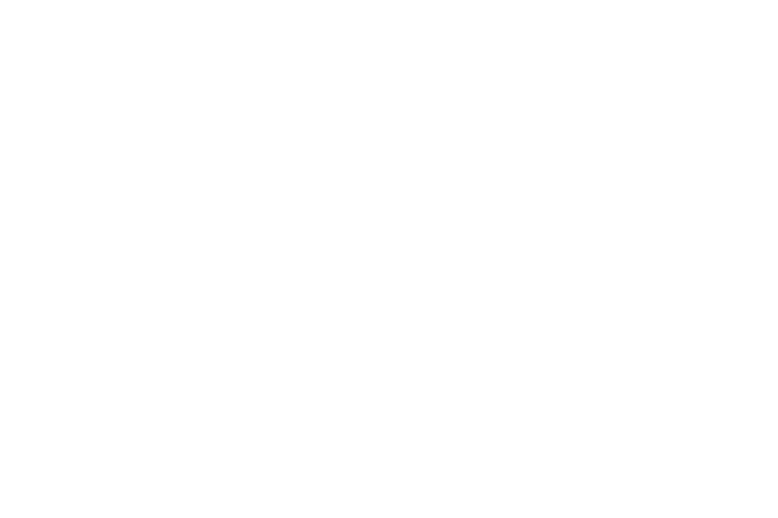

In [35]:
%matplotlib
URL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
image = io.imread(URL)
plt.axis("off")
plt.imshow(image, cmap="gray",)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


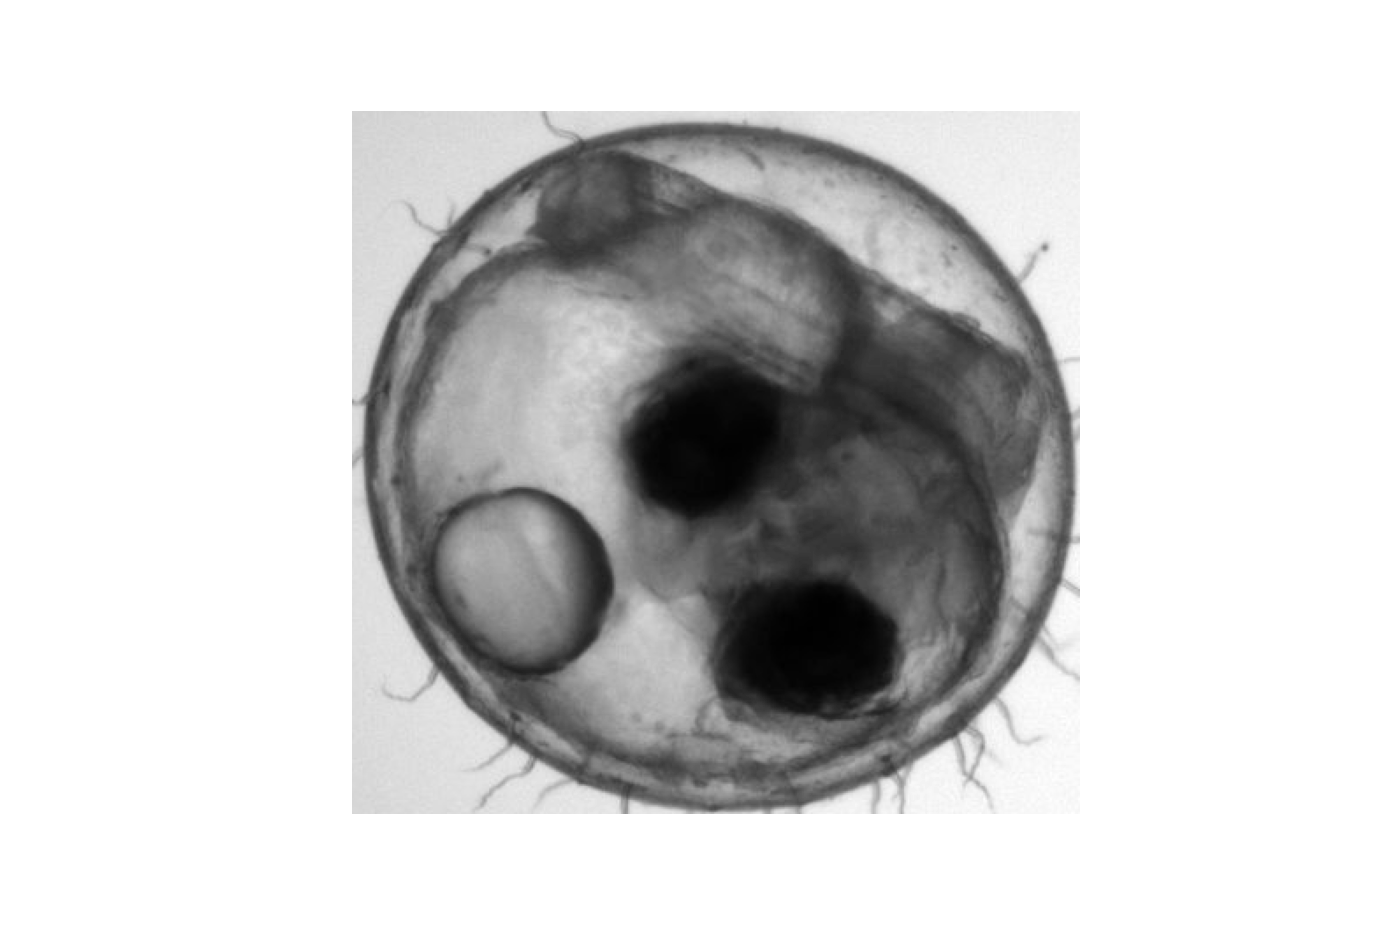

In [36]:
%matplotlib
'''creating template'''
image1 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(image1, cmap="gray")


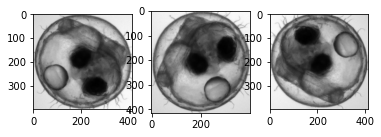

In [60]:
'''Similar to data augmentation'''

## Perform rotation of the initial template
listTemplate = [("0", temp0)]

# Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: np.rotate not good here, turns into float!
    listTemplate.append( (str(angle), rotated ) )
    axarr[i+1].imshow(rotated, cmap="gray")
    
    # We could also do some flipping with np.fliplr, flipud

In [38]:
Hits = matchTemplates(listTemplate, image, N_object=4,score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.3)
Hits

,TemplateName,BBox,Score
0,0,"(946, 784, 414, 400)",1.000000
69,180,"(1525, 968, 414, 400)",0.591937
71,180,"(1173, 1354, 414, 400)",0.551068
13,90,"(1459, 474, 400, 414)",0.538105


# Try interactively different parameters

<IPython.core.display.Javascript object>


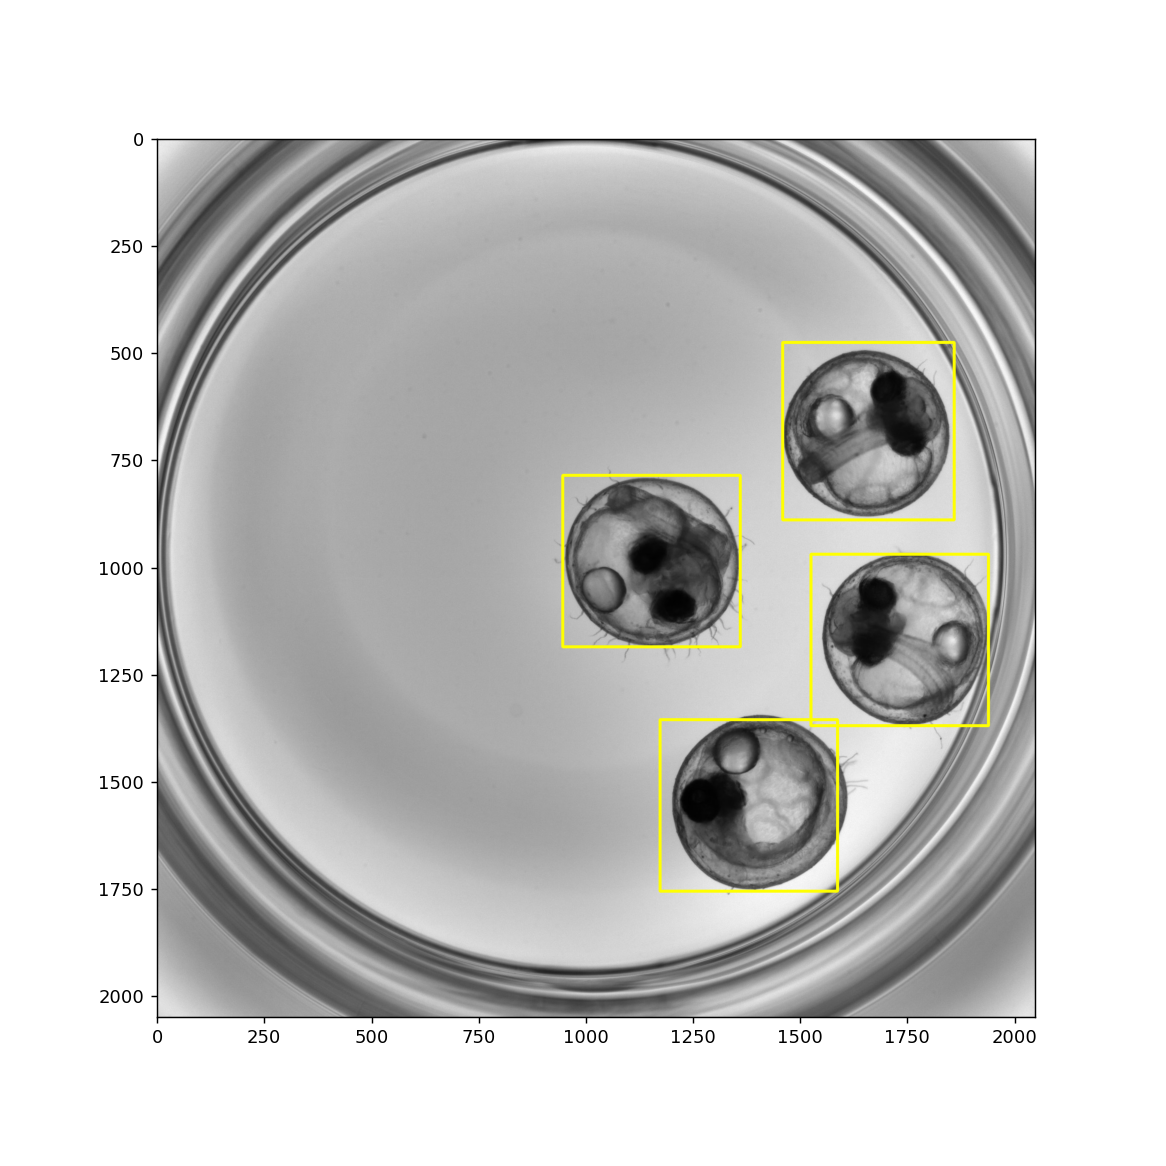

interactive(children=(IntSlider(value=4, description='N_object', max=10), FloatSlider(value=0.5, description='…

In [39]:

plt.figure("Multi-Template Matching", figsize = (5,5))

@interact( N_object=(0,10,1), score_threshold=(0, 1, 0.05), max_overlap=(0, 1, 0.1) )
def runDetection(N_object=4, score_threshold=0.5, max_overlap=0.4):
    
    Hits = matchTemplates(listTemplate, 
                          image, 
                          cv2.TM_CCOEFF_NORMED,
                          N_object,
                          score_threshold, 
                          max_overlap)
    
    Overlay = drawBoxesOnRGB(image, Hits, boxThickness=5)
    plt.cla()
    plt.imshow(Overlay)
    

In [40]:
'''read help'''
matchTemplates?

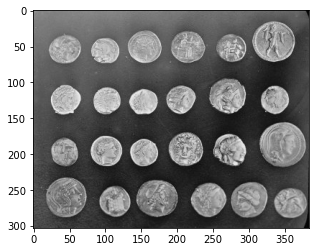

In [41]:
from skimage.data import coins

%matplotlib inline
image = coins()
plt.imshow(image, cmap="gray")

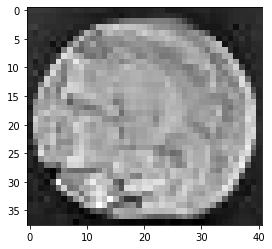

In [43]:
'''create template'''
%matplotlib inline
smallCoin = coins()[37:37+38, 80:80+41] 
plt.imshow(smallCoin, cmap="gray")

In [44]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, image, score_threshold=0.5, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)

In [45]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 18 hits


,TemplateName,BBox,Score
0,small,"(80, 37, 41, 38)",1.000000
1,small,"(133, 108, 41, 38)",0.860809
2,small,"(134, 178, 41, 38)",0.816142
3,small,"(82, 106, 41, 38)",0.800473
4,small,"(316, 105, 41, 38)",0.747887
5,small,"(23, 178, 41, 38)",0.742243
6,small,"(185, 103, 41, 38)",0.685315
7,small,"(257, 34, 41, 38)",0.657859
8,small,"(26, 103, 41, 38)",0.617952
9,small,"(22, 37, 41, 38)",0.606692


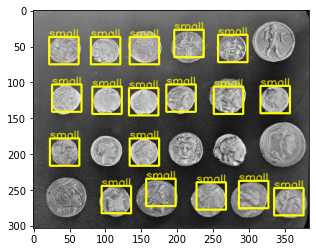

In [46]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

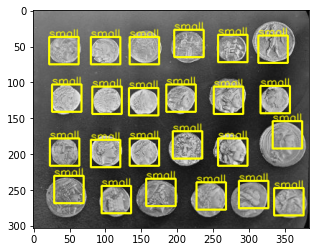

In [47]:
'''Decrease the threshold'''
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

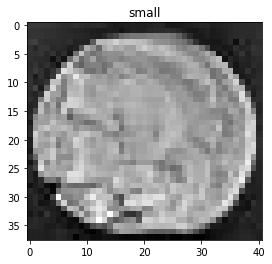

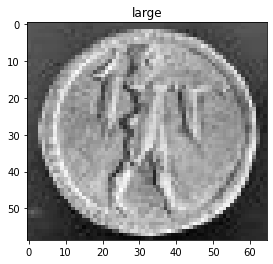

In [50]:
'''using multiple templates'''

largeCoin = coins()[14:14+59,302:302+65]
plt.figure(0)
plt.title('small')
plt.imshow(smallCoin, cmap="gray")

plt.figure(1)
plt.title('large')
plt.imshow(largeCoin, cmap="gray")

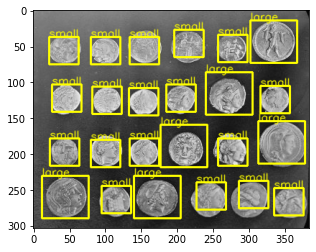

In [51]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

In [79]:
print("Original image size:", image.shape)

# Resize the image to 300x260
smallDim = 300,260
smallImage = cv2.resize(image, smallDim, interpolation = cv2.INTER_AREA) 
print("New image size: ", smallImage.shape)

Original image size: (303, 384)
New image size:  (260, 300)


Original template size: (260, 300)


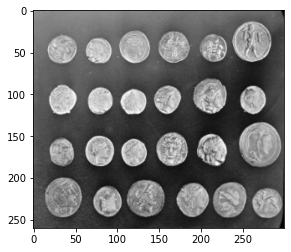

In [80]:
print("Original template size:", smallImage.shape)


plt.imshow(smallImage, cmap="gray")


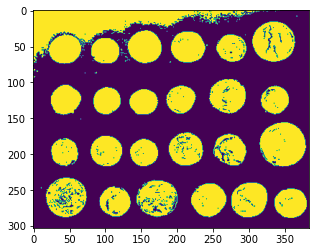

In [68]:
# threshold
theshold, mask = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask)

### If performing the detection on downscale images, we have to scale up the detected bounding-boxes. could use gluoncv library. `!pip install gluoncv mxnet`

In [81]:
# # Let's import the package first (it's quite big package so it might take a few seconds)
# import gluoncv as gcv
# import numpy as np

# # Before upscaling the bounding boxes, we need to convert them from the x,y,width,height format to xmin,ymin,xmax,ymax
# # There is also a function for that
# BBoxes_xywh = np.array( Hits["BBox"].tolist() ) 
# BBoxes_xyxy = gcv.utils.bbox.bbox_xywh_to_xyxy(BBoxes_xywh)

# # Now we can rescale it
# BBoxes = gcv.data.transforms.bbox.resize(BBoxes_xyxy, smallDim, image.shape[::-1] )

# # And display it on top of the full resolution image
# Overlay = gcv.utils.viz.cv_plot_bbox(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB), BBoxes, scores=Hits["Score"].to_numpy(), thresh=0  )
# plt.figure(figsize = (10,10))
# plt.imshow(Overlay)